### Análisis y Procesamiento de Señales
# TS3: Análisis de Fourier: FFT, desparramo, interpolación y ventaneo
#### Tatiana Galansky

## Introducción teórica
Al calcular la DFT (y, por ende, la FFT) de una señal de duración finita, surge un fenómeno particular conocido como **desparramo espectral** (*spectral leakage*). Este efecto ocurre porque la DFT asume implícitamente que la señal de entrada de $N$ muestras es periódica con período $N$. Si la frecuencia de la señal original no es un múltiplo exacto de la resolución espectral del DFT ($\Delta f = f_S/N$), la señal parece tener discontinuidades en los puntos de inicio y fin de la ventana de muestreo. Esto es equivalente a multiplicar la señal por una ventana rectangular en el dominio del tiempo, lo que en el dominio de la frecuencia se traduce en una convolución del espectro ideal de la señal con el espectro de la ventana rectangular (una función sinc periódica).

El desparramo espectral se manifiesta visualmente en el espectro de la señal de varias maneras: el pico de energía de la frecuencia fundamental se vuelve más ancho y menos nítido; la energía se dispersa entre varios bins de frecuencia en lugar de concentrarse en uno solo, disminuyendo la altura del pico principal; surgen picos secundarios de menor amplitud (lóbulos laterales) que enmascaran componentes de baja energía o se confunden con ellos, afectando la resolución de frecuencia y de amplitud.

Para cuantificar y visualizar la distribución de la potencia de una señal a través de las frecuencias, se utiliza la Densidad Espectral de Potencia (PSD). Por definición:
$$S_{XX}(\omega) \triangleq \mathcal{F}{r_{XX}[l]} = \sum_{l=-\infty}^{\infty} r_{XX}[l]e^{-j\omega l}$$

Donde $r_{XX}[l]$ es la función de autocorrelación del proceso y $\mathcal{F}{\cdot}$ denota la DFT. En aplicaciones prácticas para la estimación espectral, no se dispone de una cantidad infinita de datos ni se conoce la función de densidad de probabilidad subyacente necesaria para calcular la verdadera función de autocorrelación y, por ende, la verdadera PSD. Por esta razón, se utilizan estimadores.

Un método común para estimar la PSD a partir de datos de longitud finita es el periodograma, el cual se basa en el cuadrado de la magnitud de la DFT de la señal. La PSD se grafica típicamente en una escala logarítmica (decibelios, dB) en el eje Y y la frecuencia (normalizada) en el eje X, que representan la mitad de la potencia total para señales reales (por lo tanto, si se quiere representar la potencia total se la debe multiplicar por 2).

$$\hat{S}{XX}(\omega;N) = \frac{1}{N} |X_N(\omega)|^2$$

La Identidad de Parseval es un teorema fundamental que relaciona la energía de una señal en el dominio del tiempo con la energía de su transformada de Fourier en el dominio de la frecuencia. Para una señal discreta de longitud finita $x[n]$ con FFT $X[k]$, el teorema establece que la suma de la energía de la señal en el tiempo es igual a la suma de la energía de sus componentes frecuenciales (con un factor de escala). 

$$ \sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2 $$

Esta identidad es crucial para verificar la conservación de la potencia de la señal, asegurando que la potencia calculada en el dominio del tiempo coincida con la suma de la potencia en el espectro (integrando o sumando la PSD).

Para mitigar los efectos del desparramo espectral y mejorar la visualización del espectro, se emplea la técnica de **zero-padding**. Esta técnica consiste en añadir ceros al final de la secuencia de tiempo original antes de calcular la FFT.  Al aumentar la longitud $N$ de la transformada, se incrementa el número de puntos de muestreo en el dominio de la frecuencia (reduciendo $\Delta f$), lo que proporciona una visualización más densa y "suave" de la envolvente del espectro. Es importante comprender que el zero-padding no introduce información espectral nueva, sino que interpola la Transformada de Fourier de Tiempo Discreto subyacente, ofreciendo una estimación más detallada de la distribución de energía ya existente.

Finalmente, un sistema LTI se caracteriza completamente en el dominio del tiempo por su respuesta al impulso, $h[n]$. En el dominio de la frecuencia, esta caracterización se describe mediante su respuesta en frecuencia, $H(\omega)$, que es la Transformada de Fourier de Tiempo Discreto de $h[n]$. Cuando una señal sinusoidal de frecuencia $\omega_0$ se aplica a un sistema LTI, la salida $y[n]$ es también una sinusoide de la misma frecuencia $\omega_0$, cuya magnitud es escalada por $|H(\omega_0)|$ y cuya fase es desplazada por $\angle H(\omega_0)$. 

## Análisis y desarrollo
En primer lugar, se generaron tres señales senoidales con frecuencias tales que a cada una se le agrega una pequeña desintonía respecto a $\Delta f$, y se calculó la PSD de cada una para luego graficarlas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

def mi_funcion_sen(ff=1, nn=1000, fs=1000, vmax=1, dc=0, ph=0):
    
    n = np.arange(0,nn)
    tt = n/fs
    w0 = 2 * np.pi * ff
    xx = dc + vmax * np.sin(w0 * tt + ph)
    
    return tt, xx

def calcular_psd(x, fs=1000):
    N = len(x)
    X = fft(x)
    Pxx = (2 * np.abs(X) ** 2) / (fs * N)  # PSD estimada
    frec = np.arange(N) * fs / N
    return frec[:N//2], Pxx[:N//2]

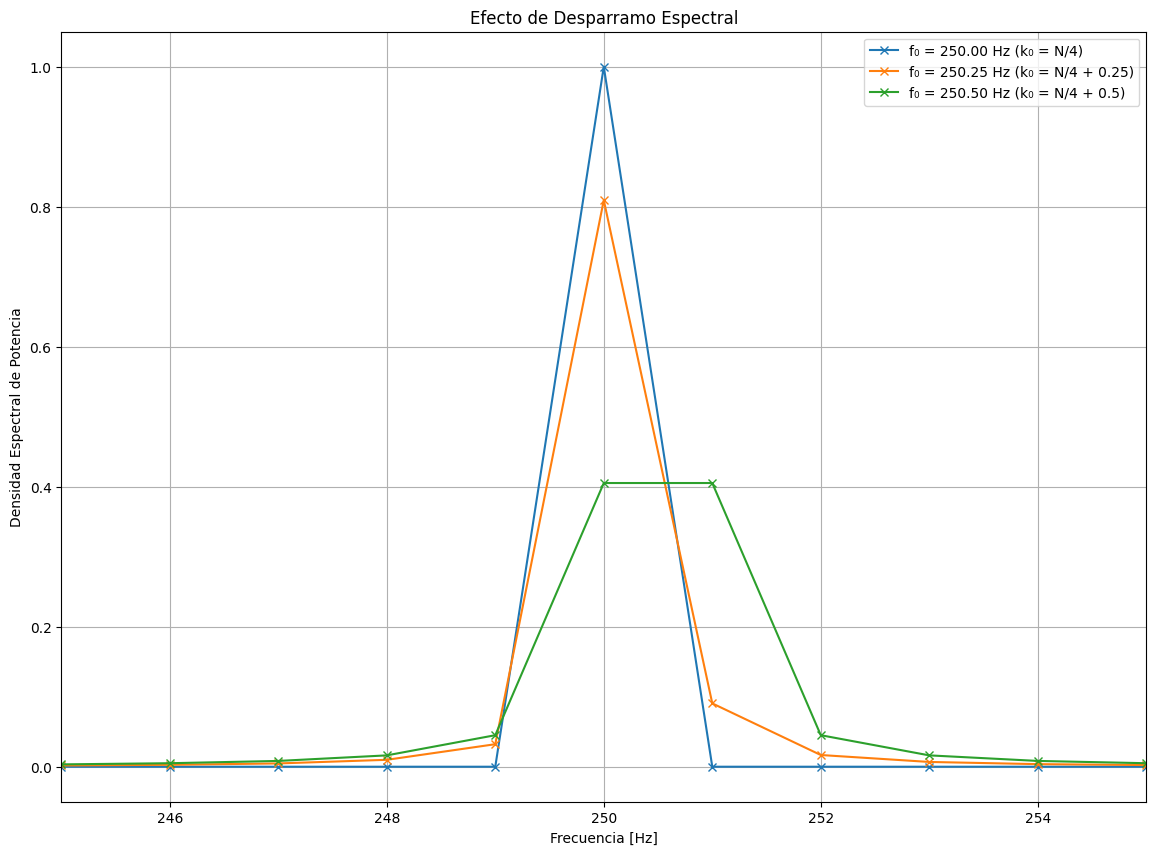

In [16]:
# Parámetros
N = 1000
fs = 1000
deltaf = fs/N  # Resolución espectral = 1

# Generar señales con diferentes frecuencias
k0 = N/4
f1 = k0 * deltaf
f2 = (k0 + 0.25) * deltaf
f3 = (k0 + 0.5) * deltaf
A = np.sqrt(2)  # Potencia normalizada

t1,x1 = mi_funcion_sen(ff=f1,nn=N,fs=fs,vmax=A)
t2,x2 = mi_funcion_sen(ff=f2,nn=N,fs=fs,vmax=A)
t3,x3 = mi_funcion_sen(ff=f3,nn=N,fs=fs,vmax=A)

senales = [x1, x2, x3]
nombres = [f'f₀ = {f1:.2f} Hz (k₀ = N/4)', 
           f'f₀ = {f2:.2f} Hz (k₀ = N/4 + 0.25)', 
           f'f₀ = {f3:.2f} Hz (k₀ = N/4 + 0.5)']

# Graficar PSDs
plt.figure(figsize=(14, 10))

for i, (senal, nombre) in enumerate(zip(senales, nombres)):
    frec, Pxx = calcular_psd(senal, fs)
    plt.plot(frec, Pxx, '-x', label=nombre)

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad Espectral de Potencia')
plt.title('Efecto de Desparramo Espectral')
plt.legend()
plt.grid(True)
plt.xlim(245, 255)
plt.show()

Se realizó un gráfico en escala logarítmica para evidenciar mejor las diferencias.

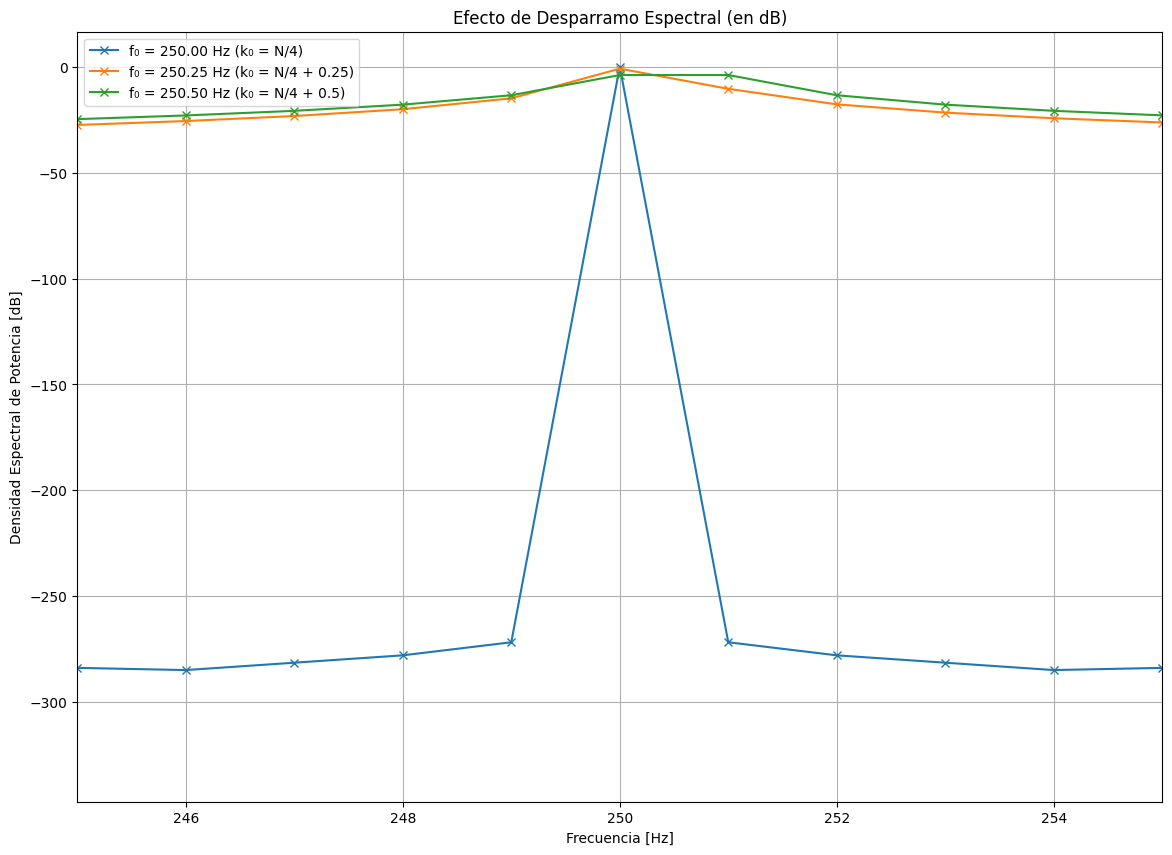

In [15]:
plt.figure(figsize=(14, 10))

for i, (senal, nombre) in enumerate(zip(senales, nombres)):
    frec, Pxx = calcular_psd(senal, fs)
    Pxx_db = 10 * np.log10(Pxx)
    plt.plot(frec, Pxx_db, '-x', label=nombre)

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad Espectral de Potencia [dB]')
plt.title('Efecto de Desparramo Espectral (en dB)')
plt.legend()
plt.grid(True)
plt.xlim(245, 255)
plt.show()

El efecto de la desintonía en el espectro se manifiesta como desparramo espectral. Esto ocurre cuando la frecuencia de la senoidal $f_0$ no coincide con un múltiplo entero de la resolución en frecuencia de la DFT ($\Delta f = f_s /N$). En esas condiciones, la energía deja de concentrarse en un único bin de frecuencia y comienza a repartirse entre bins adyacentes. La causa fundamental es que, al analizar un tramo finito de la señal, se está multiplicando en el tiempo por una ventana (rectangular en este caso), lo cual en frecuencia equivale a una convolución con la transformada de dicha ventana. Para la ventana rectangular, esta transformada es una función tipo sinc, con un lóbulo principal y lóbulos laterales.

Visualmente, esto se traduce en que una frecuencia perfectamente alineada genera un espectro con un único pico definido y más alto ya que toda la energía se concentra en éste, y ceros en el resto de las frecuencias, mientras que una frecuencia apenas desintonizada presenta un lóbulo principal más ancho (como es el caso del espectro de la senoidal de $250.5 Hz$) y energía distribuida en los lóbulos laterales (primer gráfico). En consecuencia, una diferencia de apenas fracciones de hertz produce un espectro notablemente distinto, aun cuando la potencia total de la señal se mantenga invariante.

Al graficar en escala logarítmica (dB), estas diferencias se hacen aún más evidentes. La senoidal alineada muestra un pico muy alto y aislado, mientras que el resto de los bins caen a niveles extremadamente bajos. Por otro lado, el espectro de las señales desintonizadas no muestra claramente la forma sinc, sino más bien una distribución que parece lineal con un leve pico central. Esto se debe a la resolución limitada en frecuencia de la FFT, que “esconde” la forma de la envolvente sinc.

Luego, se verificó la potencia unitaria de cada PSD, utilizando la Identidad de Parseval.

In [5]:
def verificar_potencia_parseval(x, fs):
    N = len(x)
    
    # Potencia en dominio del tiempo
    potencia_tiempo = np.sum(x**2) / N
    
    # Potencia en dominio de frecuencia (Parseval)
    X = fft(x)
    potencia_frecuencia = np.sum(np.abs(X)**2) / (N**2)
    
    # Potencia con PSD
    frec, Pxx = calcular_psd(x, fs)
    potencia_psd = np.sum(Pxx) * (fs / N)
    
    print(f"Potencia en tiempo: {potencia_tiempo:.4f} W")
    print(f"Potencia en frecuencia (Parseval): {potencia_frecuencia:.4f} W")
    print(f"Potencia integrando PSD: {potencia_psd:.4f} W")

# Verificar potencia unitaria
for i, (senal, nombre) in enumerate(zip(senales, nombres)):
    print(f"\n{nombre}:")
    verificar_potencia_parseval(senal, fs)



f₀ = 250.00 Hz (k₀ = N/4):
Potencia en tiempo: 1.0000 W
Potencia en frecuencia (Parseval): 1.0000 W
Potencia integrando PSD: 1.0000 W

f₀ = 250.25 Hz (k₀ = N/4 + 0.25):
Potencia en tiempo: 0.9990 W
Potencia en frecuencia (Parseval): 0.9990 W
Potencia integrando PSD: 0.9990 W

f₀ = 250.50 Hz (k₀ = N/4 + 0.5):
Potencia en tiempo: 1.0000 W
Potencia en frecuencia (Parseval): 1.0000 W
Potencia integrando PSD: 1.0000 W


Los resultados obtenidos confirman que la potencia total de las señales senoidales se conserva en el dominio de la frecuencia, de acuerdo con la Identidad de Parseval, validando así la correcta implementación del cálculo espectral. En el caso alineado, la energía se concentra en un único bin de frecuencia, generando un pico muy alto y localizado. En cambio, en las señales desintonizadas, la energía se reparte entre varios bins adyacentes: el lóbulo principal aparece más ancho, la altura del pico máximo disminuye y parte de la potencia se distribuye en lóbulos laterales. De este modo, aunque la potencia global se mantiene invariante, la forma del espectro cambia drásticamente por la interacción entre la frecuencia de la señal y la discretización impuesta por la DFT, lo que evidencia la importancia del fenómeno de desparramo en el análisis espectral.

Por último, se repitió el experimento utilizando la técnica de zero-padding, en este caso agregando $9*N$ ceros al final.

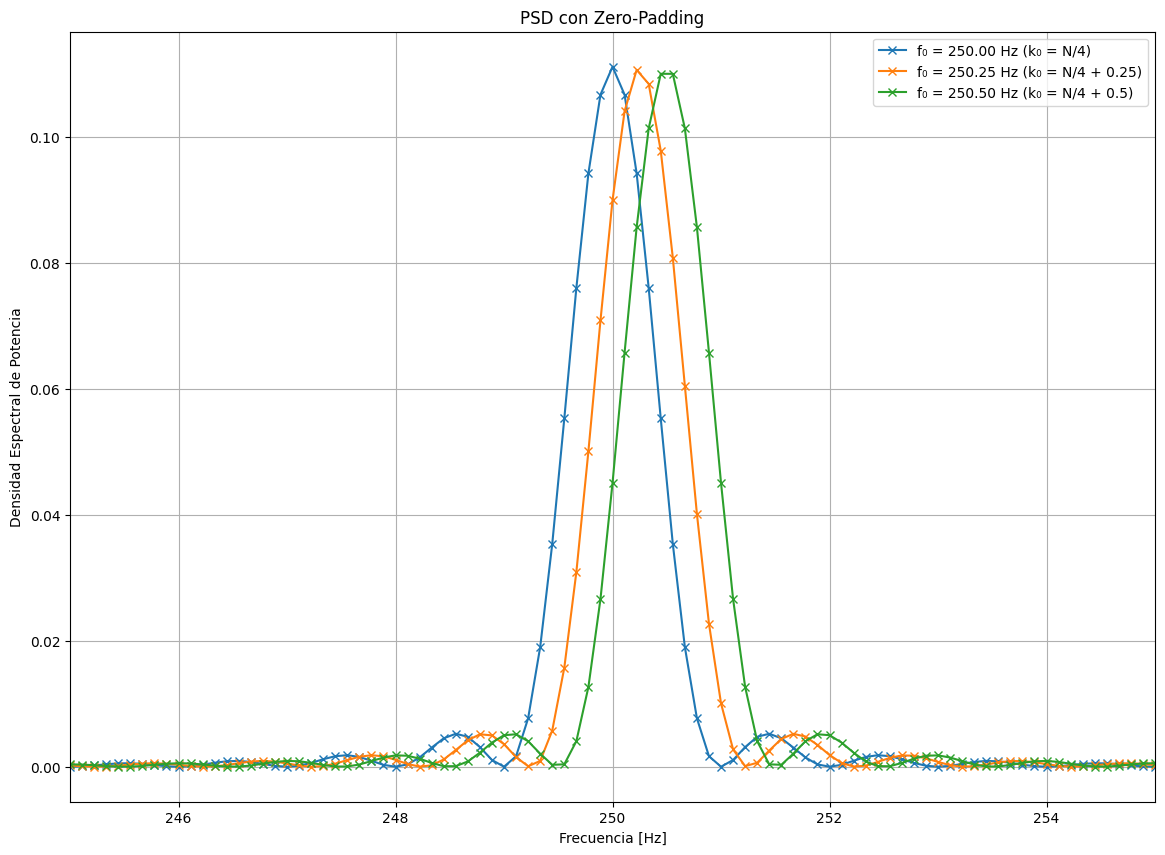

In [14]:
# Zero padding
cant_ceros = 9
N_pad = N * cant_ceros

plt.figure(figsize=(14, 10))

for i, (senal, nombre) in enumerate(zip(senales, nombres)):
    senal_zp = np.zeros(N_pad)
    senal_zp[:N] = senal
    
    # Calcular PSD con zero-padding
    frec_zp, Pxx_zp = calcular_psd(senal_zp, fs)
    plt.plot(frec_zp, Pxx_zp, '-x', label=nombre)

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad Espectral de Potencia')
plt.title(f'PSD con Zero-Padding')
plt.legend()
plt.grid(True)
plt.xlim(245, 255)
plt.show()


Nuevamente, se realizó un gráfico en escala logarítmica a fin de apreciar mejor las diferencias.

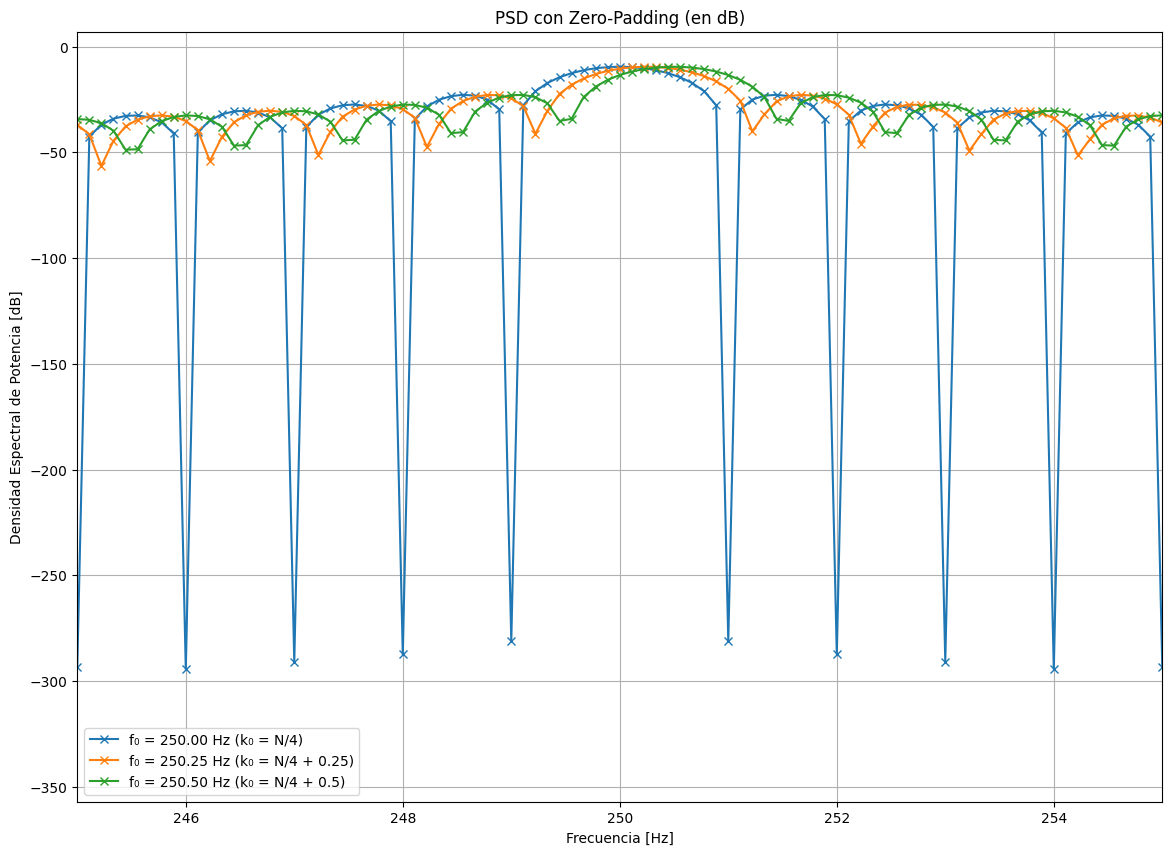

In [13]:
plt.figure(figsize=(14, 10))

for i, (senal, nombre) in enumerate(zip(senales, nombres)):
    senal_zp = np.zeros(N_pad)
    senal_zp[:N] = senal
    
    # Calcular PSD con zero-padding
    frec_zp, Pxx_zp = calcular_psd(senal_zp, fs)
    Pxx_zp_db = 10 * np.log10(Pxx_zp)
    plt.plot(frec_zp, Pxx_zp_db, '-x', label=nombre)

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad Espectral de Potencia [dB]')
plt.title(f'PSD con Zero-Padding (en dB)')
plt.legend()
plt.grid(True)
plt.xlim(245, 255)
plt.show()


En escala lineal, el uso de zero-padding permite interpolar el espectro y visualizar con mayor claridad la forma de las funciones sinc resultantes del truncamiento temporal. En el caso alineado, la sinc aparece con su lóbulo principal centrado en la frecuencia correspondiente y con nulos perfectos en los bins adyacentes, mientras que en las desintonizadas la energía se reparte, disminuye la altura de su lóbulo principal. En todos los casos, la potencia total se conserva de acuerdo con la Identidad de Parseval.

En escala logarítmica, el fenómeno de desparramo espectral se hace aún más evidente. La señal alineada presenta lóbulos laterales que caen a valores extremadamente bajos (cercanos a –300 dB), mientras que en las señales desintonizadas estos lóbulos se mantienen mucho más elevados (cercanos a –50 dB), generando un “piso” espectral más alto en las frecuencias adyacentes. Así, el zero-padding no mejora la resolución espectral real, pero sí ofrece una visualización más detallada del desparramo y de las diferencias de altura entre el caso ideal y los desintonizados.

## Bonus
De los sistemas LTI dados en la Tarea Semanal 2, solo uno de ellos resultaba estable: 
$$y[n]=x[n]+3\cdot x[n-10]$$
Por esta razón, este es el caso relevante para analizar la respuesta en frecuencia. A continuación se muestran los gráficos de magnitud (en dB) y fase de la respuesta en frecuencia, que proporcionan información sobre cómo un sistema LTI estable interactúa con las diferentes frecuencias de una señal, indicando qué frecuencias son amplificadas/atenuadas y con qué retardo temporal/desplazamiento de fase.

In [10]:
# SISTEMA 1: y[n] = x[n] + 3·x[n-10]
# Respuesta al impulso
N1 = 100
fs1 = 50000 
delta = np.zeros(N1)
delta[0] = 1
h1 = np.zeros(N1)

for n in range(N1):
    if n >= 0:
        h1[n] += delta[n]      # x[n]
    if n >= 10:
        h1[n] += 3 * delta[n-10]  # 3·x[n-10]

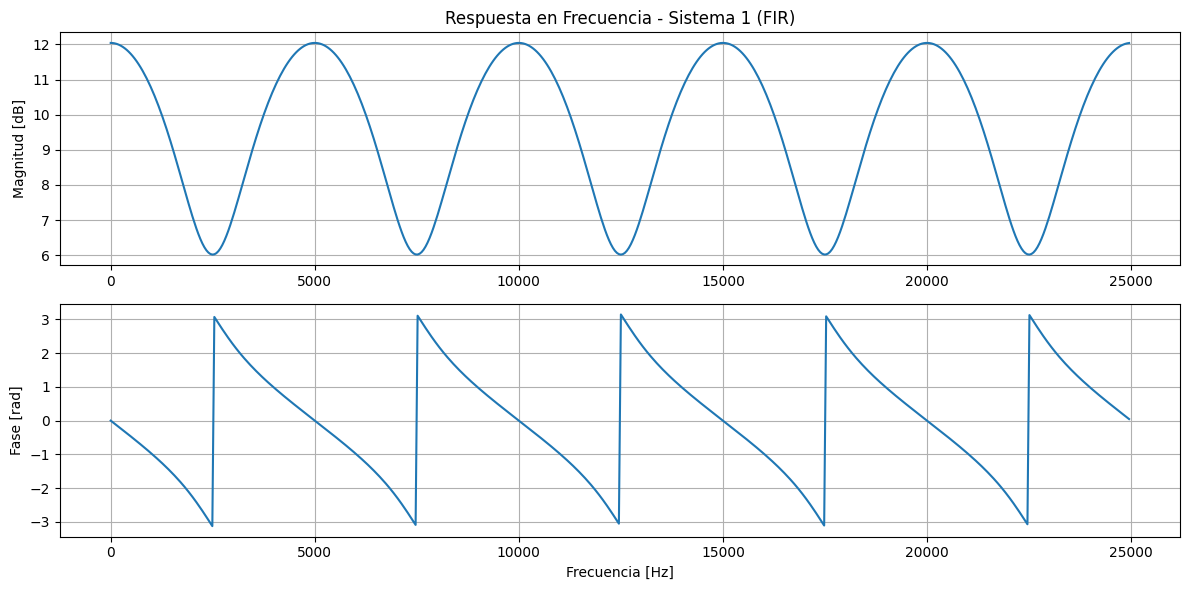

In [12]:
from scipy import signal
# Respuesta en frecuencia del Sistema 1 (el estable)
w, H1_frec = signal.freqz(h1, fs=fs1)  # Esta funcion devuelve las frecuencias [0,pi] y la respuesta en frecuencia (nros. complejos)
plt.figure(7, figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(np.abs(H1_frec) + 1e-10))
plt.title('Respuesta en Frecuencia - Sistema 1 (FIR)')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(H1_frec))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusiones
El experimento demostró claramente el efecto de desparramo espectral como un fenómeno inherente al análisis de señales de duración finita. Cuando la frecuencia de la señal senoidal coincide exactamente con un múltiplo entero de la resolución de frecuencia de la DFT, su energía se concentra en un único bin de frecuencia, resultando en un pico espectral nítido y localizado. Por el contrario, la introducción de una pequeña desintonía provoca que la energía se distribuya a través de múltiples bins adyacentes, manifestándose como un lóbulo principal más ancho acompañado de lóbulos laterales significativos. Este comportamiento es consecuencia directa de la truncación temporal de la señal, que en el dominio frecuencial equivale a la convolución del espectro ideal con la transformada de Fourier de la ventana rectangular.

La verificación de la potencia mediante la Identidad de Parseval confirmó que, a pesar de las drásticas diferencias visuales en los espectros, la energía total de la señal se conserva entre los dominios temporal y frecuencial. Este principio fundamental subraya que el desparramo espectral representa una redistribución de la energía existente y no una pérdida o ganancia de la misma.

La aplicación de zero-padding demostró ser una herramienta valiosa para la visualización espectral detallada. Si bien no introduce nueva información espectral, esta técnica permite una interpolación más fina de la transformada de Fourier de tiempo discreto subyacente, revelando con mayor claridad la estructura de los lóbulos principales y laterales. En escala logarítmica, esta aproximación hizo evidente la diferencia entre el piso de ruido de las señales desintonizadas y la atenuación profunda de la señal perfectamente alineada.

Finalmente, el análisis de sistemas LTI estables destacó la importancia de caracterizar completamente la respuesta en frecuencia mediante gráficos de magnitud y fase. La estabilidad del sistema garantiza que la transformada de Fourier de su respuesta al impulso converge, permitiendo una interpretación significativa de cómo el sistema modifica las componentes frecuenciales de las señales de entrada.

## Autoevaluación del aprendizaje
A través de la lectura de la bibliografía y las actividades realizadas en clase pude comprender el fenómeno de desparramo espectral y el método de zero-padding. Tuve algunos problemas en cuanto a la verificación de la energía unitaria a través de la Identidad de Parseval, pero comprendí que se debía multiplicar por 2 para obtener toda la energía, ya que la PSD unilateral debe compensar la energía de las frecuencias negativas que están implícitas en la simetría conjugada de la DFT para señales reales. Utilicé herramientas de inteligencia artificial para mejorar algunas partes del código y para interpretar algunos resultados. 

## Bibliografía
Holton, T. (2021). *Digital Signal Processing: Principles and Applications*. Cambridge University Press.